# Visuals

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [51]:
df = pd.read_csv('NBA-2014-2017.csv', header = 0)

In [6]:
from scipy.stats import gaussian_kde

density1 = gaussian_kde(df[df['Year']==2014]['average salary'])
density1.covariance_factor = lambda : .25
density1._compute_covariance()

density2 = gaussian_kde(df[df['Year']==2015]['average salary'])
density2.covariance_factor = lambda : .25
density2._compute_covariance()

density3 = gaussian_kde(df[df['Year']==2016]['average salary'])
density3.covariance_factor = lambda : .25
density3._compute_covariance()

density4 = gaussian_kde(df[df['Year']==2017]['average salary'])
density4.covariance_factor = lambda : .25
density4._compute_covariance()

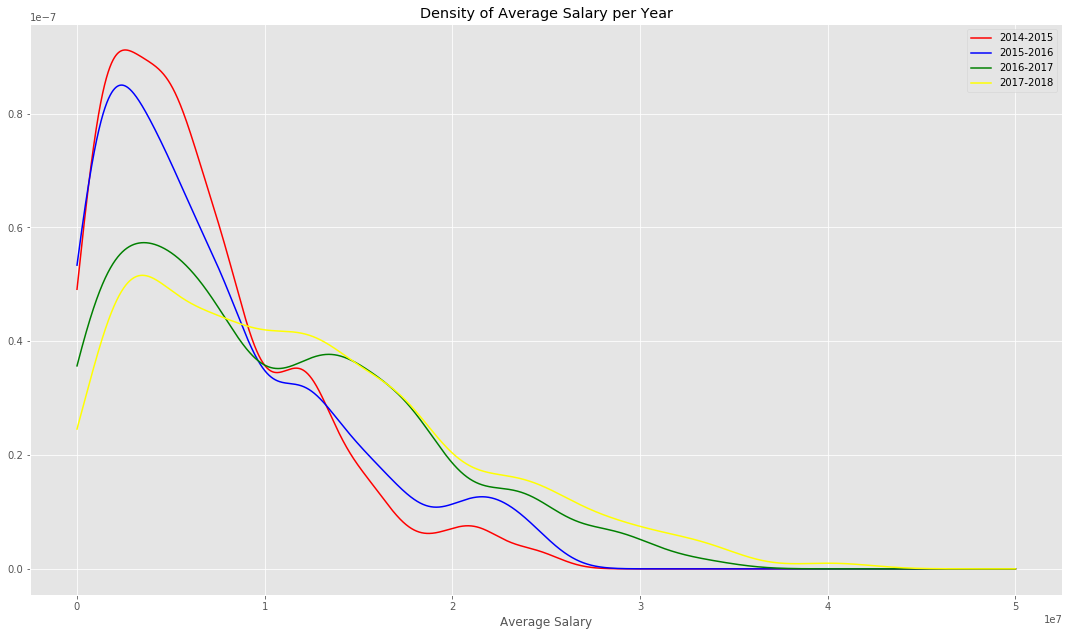

In [8]:
# Plot them
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
xs = np.linspace(0,50000000, 500000)

plt.plot(xs, density1(xs), color = "red", label = "2014-2015")
plt.plot(xs, density2(xs), color = "blue", label = "2015-2016")
plt.plot(xs, density3(xs), color = "green", label = "2016-2017")
plt.plot(xs, density4(xs), color = "yellow", label = "2017-2018")
plt.xlabel("Average Salary")
plt.legend(loc = "upper right")
plt.title("Density of Average Salary per Year")
plt.savefig('avgSalDensity.png', format="png")
plt.show()

# By Team Boxplot

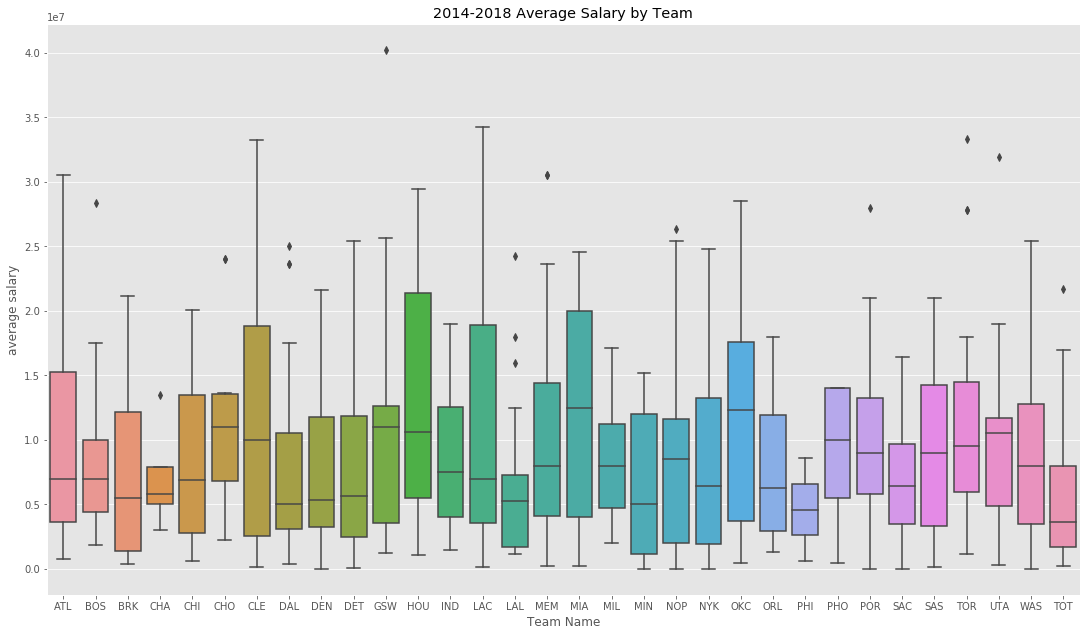

In [36]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
p1=sns.boxplot(x='Tm', y='average salary', data=df, order = ['ATL','BOS','BRK','CHA','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS','TOT'])
plt.xlabel('Team Name')
plt.title('2014-2018 Average Salary by Team')
plt.savefig('avgSalPerTeam.png', format="png")
plt.show()

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df.rename(columns={'average salary':'average.salary'}, inplace=True)

mod = ols('average.salary ~ Tm',
                data=df).fit()
                
#aov_table = sm.stats.anova_lm(mod, typ=2)
#print(aov_table)

PatsyError: Error evaluating factor: NameError: name 'average' is not defined
    average.salary ~ Tm
    ^^^^^^^^^^^^^^

# By Position Boxplot

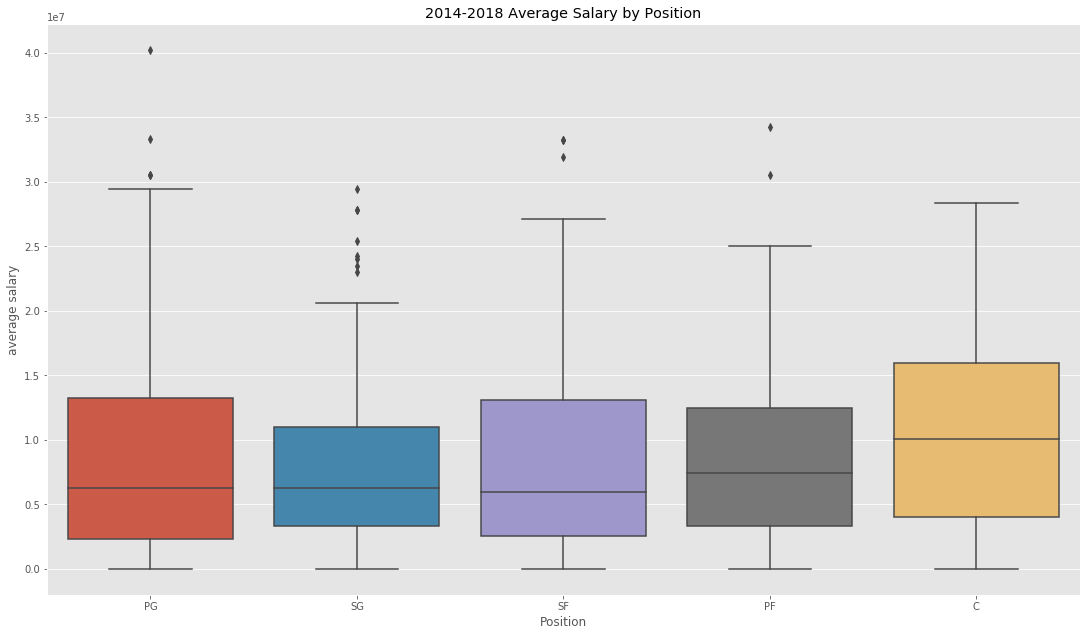

In [37]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
p1=sns.boxplot(x='Pos', y='average salary', data=df, order = ['PG','SG','SF','PF','C'])
plt.xlabel('Position')
plt.title('2014-2018 Average Salary by Position')
plt.savefig('avgSalPerPos.png', format="png")
plt.show()